# Soal Ujian Module 2 Purwadhika

### 1. Import the libraries (pandas,numpy, matplotlib.pyplot, seaborn, math)

#### Use random.seed(101)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
random.seed(101)
%matplotlib inline

### 2. Load Titanic Dataset from Seaborn and show the .head() of the dataset

In [2]:
df_titanic = sns.load_dataset('Titanic')
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 3. Show the info of the dataframe using .info()

In [3]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null object
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null object
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.3+ KB


### 4. Describe the dataframe using .describe()

In [4]:
df_titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 5. Make Table like this to describe the dataframe

#### Columns Explanations :
 - __dataFeatures__ = column name
 - __dataType__ = data type of that column
 - __null__ = how many null data in that column/series
 - __nullPct__ = null percentage of total data in that column
 - __unique__ = how many unique data
 - __uniqueSample__ = get some unique sample from each column

#### hint : search .sample(), .drop_duplicates(), .values, .isna(), dtype

In [10]:
df_titanic_desc = pd.DataFrame(columns = ['dataFeatures','dataType','null','nullPct','unique','uniqueSample'])

In [25]:
df_titanic_desc['dataFeatures'] = df_titanic.columns.tolist()

In [32]:
tmp1 = []
tmp2 = []
tmp3 = []
tmp4 = []
tmp5 = []
for i in df_titanic_desc['dataFeatures']:
    tmp1.append(str(df_titanic[i].dtypes))
    tmp2.append(df_titanic[i].isna().sum())
    tmp3.append(df_titanic[i].isna().sum()/df_titanic[i].value_counts().sum())
    tmp4.append(df_titanic[i].nunique())
    tmp5.append(df_titanic[i].sample(2).get_values())

df_titanic_desc['null'] = tmp2
df_titanic_desc['nullPct'] = tmp3
df_titanic_desc['unique'] = tmp4
df_titanic_desc['uniqueSample'] = tmp5

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,survived,int64,0,0.00,2,"[0, 1]"
1,pclass,int64,0,0.00,3,"[2, 3]"
2,sex,object,0,0.00,2,"[male, female]"
3,age,float64,177,19.87,88,"[32.5, 2.0]"
4,sibsp,int64,0,0.00,7,"[8, 0]"
5,parch,int64,0,0.00,7,"[3, 4]"
6,fare,float64,0,0.00,248,"[7.4958, 15.05]"
7,embarked,object,2,0.22,3,"[Q, C]"
8,class,category,0,0.00,3,"[Third, First]"
9,who,object,0,0.00,3,"[woman, man]"


### 6. Groupby

_Group By Sex (Mean)_

In [40]:
df_titanic.groupby(['sex']).mean()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
sex,,,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,0.000000,0.401274
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,0.930676,0.712305


_Group By Sex (standard deviation)_

In [7]:
df_titanic.groupby(['sex']).std()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
sex,,,,,,,,
female,0.438211,0.85729,14.110146,1.156520,1.022846,57.997698,0.000000,0.490939
male,0.391775,0.81358,14.678201,1.061811,0.612294,43.138263,0.254225,0.453081


_Group By Sex (Minimum value)_

In [45]:
df_titanic.groupby(['sex']).min()

,survived,pclass,age,sibsp,parch,fare,class,who,adult_male,alive,alone
sex,,,,,,,,,,,
female,0,1,0.75,0,0,6.75,First,child,False,no,False
male,0,1,0.42,0,0,0.00,First,child,False,no,False


_Group By Sex (Maximum value)_

In [46]:
df_titanic.groupby(['sex']).max()

,survived,pclass,age,sibsp,parch,fare,class,who,adult_male,alive,alone
sex,,,,,,,,,,,
female,1,3,63.0,8,6,512.3292,Third,woman,False,yes,True
male,1,3,80.0,8,5,512.3292,Third,man,True,yes,True


_Group By Sex (Count)_

In [47]:
df_titanic.groupby(['sex']).count()

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
sex,,,,,,,,,,,,,,
female,314,314,261,314,314,314,312,314,314,314,97,312,314,314
male,577,577,453,577,577,577,577,577,577,577,106,577,577,577


_Group By Sex (Describe Transpose)_

In [52]:
df_titanic.groupby(['sex']).describe().transpose()

sex                 female        male
survived count  314.000000  577.000000
         mean     0.742038    0.188908
         std      0.438211    0.391775
         min      0.000000    0.000000
         25%      0.000000    0.000000
         50%      1.000000    0.000000
         75%      1.000000    0.000000
         max      1.000000    1.000000
pclass   count  314.000000  577.000000
         mean     2.159236    2.389948
         std      0.857290    0.813580
         min      1.000000    1.000000
         25%      1.000000    2.000000
         50%      2.000000    3.000000
         75%      3.000000    3.000000
         max      3.000000    3.000000
age      count  261.000000  453.000000
         mean    27.915709   30.726645
         std     14.110146   14.678201
         min      0.750000    0.420000
         25%     18.000000   21.000000
         50%     27.000000   29.000000
         75%     37.000000   39.000000
         max     63.000000   80.000000
sibsp    count  314.000000  577.000000
         mean     0.694268    0.429809
         std      1.156520    1.061811
         min      0.000000    0.000000
         25%      0.000000    0.000000
         50%      0.000000    0.000000
         75%      1.000000    0.000000
         max      8.000000    8.000000
parch    count  314.000000  577.000000
         mean     0.649682    0.235702
         std      1.022846    0.612294
         min      0.000000    0.000000
         25%      0.000000    0.000000
         50%      0.000000    0.000000
         75%      1.000000    0.000000
         max      6.000000    5.000000
fare     count  314.000000  577.000000
         mean    44.479818   25.523893
         std     57.997698   43.138263
         min      6.750000    0.000000
         25%     12.071875    7.895800
         50%     23.000000   10.500000
         75%     55.000000   26.550000
         max    512.329200  512.329200

sex                 female        male
age      count  261.000000  453.000000
         mean    27.915709   30.726645
         std     14.110146   14.678201
         min      0.750000    0.420000
         25%     18.000000   21.000000
         50%     27.000000   29.000000
         75%     37.000000   39.000000
         max     63.000000   80.000000
fare     count  314.000000  577.000000
         mean    44.479818   25.523893
         std     57.997698   43.138263
         min      6.750000    0.000000
         25%     12.071875    7.895800
         50%     23.000000   10.500000
         75%     55.000000   26.550000
         max    512.329200  512.329200
parch    count  314.000000  577.000000
         mean     0.649682    0.235702
         std      1.022846    0.612294
         min      0.000000    0.000000
         25%      0.000000    0.000000
         50%      0.000000    0.000000
         75%      1.000000    0.000000
         max      6.000000    5.000000
pclass   count  314.000000  577.000000
         mean     2.159236    2.389948
         std      0.857290    0.813580
         min      1.000000    1.000000
         25%      1.000000    2.000000
         50%      2.000000    3.000000
         75%      3.000000    3.000000
         max      3.000000    3.000000
sibsp    count  314.000000  577.000000
         mean     0.694268    0.429809
         std      1.156520    1.061811
         min      0.000000    0.000000
         25%      0.000000    0.000000
         50%      0.000000    0.000000
         75%      1.000000    0.000000
         max      8.000000    8.000000
survived count  314.000000  577.000000
         mean     0.742038    0.188908
         std      0.438211    0.391775
         min      0.000000    0.000000
         25%      0.000000    0.000000
         50%      1.000000    0.000000
         75%      1.000000    0.000000
         max      1.000000    1.000000

### 7. Filter

#### Berapa banyak jumlah datanya kalau datanya cuma class = First dan class = Third ?

#### Berapa mean umur pria dari campuran class First dan Third?

#### lalu munculkan 5 data teratas dari filter tersebut dan cuma kolom sex dan age aja yang muncul

In [61]:
df_titanic_class.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False


In [90]:
df_titanic_class = df_titanic[(df_titanic['class'] == 'First') | (df_titanic['class'] == 'Third')]
print('Jumlah Data: ' + str(len(df_titanic_class)))
print('Mean Umur Pria: ' + str(df_titanic_class[df_titanic['sex'] == 'male']['age'].mean()))
df_titanic_class[['sex','age']].head(5)

Jumlah Data: 707
Mean Umur Pria: 30.72271186440678


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,sex,age
0,male,22.0
1,female,38.0
2,female,26.0
3,female,35.0
4,male,35.0


#### Berapa total fare dari penumpang yang second class dan sendirian?

In [3]:
df_titanic_fare = df_titanic[(df_titanic['class'] == 'Second') & (df_titanic['alone'] == True)]
df_titanic_fare['fare'].sum()

1462.875

In [7]:
df_titanic.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [88]:
df_titanic['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

### 8. Missing Values
#### Berapa banyak NaN age data dan mean dari setiap who?
#### Isi data NaN dari kolom age dengan mean dari umur tergantung whonya dia apa (child/woman/man)
#### Kemudian print banyak NaN age data dan mean umur setiap who lagi.
#### Lalu ubah tipe column age menjadi int64

In [176]:
df_titanic_NaN_m = df_titanic[(df_titanic['who'] == 'man') & (df_titanic['age'].isna())]
df_titanic_NaN_f = df_titanic[(df_titanic['who'] == 'woman') & (df_titanic['age'].isna())]
df_titanic_NaN_c = df_titanic[(df_titanic['who'] == 'child') & (df_titanic['age'].isna())]

In [114]:
mean_man = df_titanic[(df_titanic['who'] == 'man')].mean().age
mean_woman = df_titanic[(df_titanic['who'] == 'woman')].mean().age
mean_child = df_titanic[(df_titanic['who'] == 'child')].mean().age
mean_woman

32.0

In [26]:
print( 'Banyak NaN man & mean: ' + str(df_titanic_NaN_m['age'].isna().sum()) + ' & ' + str(df_titanic[(df_titanic['who'] == 'man')].mean().age))
print( 'Banyak NaN woman & mean: ' + str(df_titanic_NaN_f['age'].isna().sum()) + ' & ' + str(df_titanic[(df_titanic['who'] == 'woman')].mean().age))
print( 'Banyak NaN child & mean: ' + str(df_titanic_NaN_c['age'].isna().sum()) + ' & ' + str(df_titanic[(df_titanic['who'] == 'child')].mean().age))

Banyak NaN man & mean: 124 & 33.17312348668281
Banyak NaN woman & mean: 53 & 32.0
Banyak NaN child & mean: 0 & 6.369518072289157


In [138]:
# df_titanic.loc[(df_titanic['who'] == 'man')]['age'].fillna(mean_man)

In [157]:
# if df_titanic['who'] == 'man' and df_titanic['age'].isna():
#     df_titanic['age'].fillna(mean_man)

In [174]:
df_titanic.loc[(df_titanic['who'] == 'man') & (df_titanic['age'].isna()), 'age'] = mean_man 
df_titanic.loc[(df_titanic['who'] == 'woman') & (df_titanic['age'].isna()), 'age'] = mean_woman
df_titanic.loc[(df_titanic['who'] == 'child') & (df_titanic['age'].isna()), 'age'] = mean_child

In [239]:
print( 'Banyak NaN man & mean: ' + str(df_titanic_NaN_m['age'].isna().sum()) + ' & ' + str(df_titanic[(df_titanic['who'] == 'man')].mean().age))
print( 'Banyak NaN woman & mean: ' + str(df_titanic_NaN_f['age'].isna().sum()) + ' & ' + str(df_titanic[(df_titanic['who'] == 'woman')].mean().age))
print( 'Banyak NaN child & mean: ' + str(df_titanic_NaN_c['age'].isna().sum()) + ' & ' + str(df_titanic[(df_titanic['who'] == 'child')].mean().age))

Banyak NaN man & mean: 0 & 33.17312348668271
Banyak NaN woman & mean: 0 & 32.0
Banyak NaN child & mean: 0 & 6.369518072289157


In [178]:
df_titanic.astype({'age': 'int64'}).dtypes

survived         int64
pclass           int64
sex             object
age              int64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

In [246]:
df_titanic.sample(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
752,0,3,male,33.000000,0,0,9.5000,S,Third,man,True,C,Southampton,no,True
529,0,2,male,23.000000,2,1,11.5000,S,Second,man,True,C,Southampton,no,False
466,0,2,male,33.173123,0,0,0.0000,S,Second,man,True,C,Southampton,no,True
117,0,2,male,29.000000,1,0,21.0000,S,Second,man,True,C,Southampton,no,False
309,1,1,female,30.000000,0,0,56.9292,C,First,woman,False,E,Cherbourg,yes,True
833,0,3,male,23.000000,0,0,7.8542,S,Third,man,True,C,Southampton,no,True
435,1,1,female,14.000000,1,2,120.0000,S,First,child,False,B,Southampton,yes,False
403,0,3,male,28.000000,1,0,15.8500,S,Third,man,True,C,Southampton,no,False
270,0,1,male,33.173123,0,0,31.0000,S,First,man,True,C,Southampton,no,True
809,1,1,female,33.000000,1,0,53.1000,S,First,woman,False,E,Southampton,yes,False


#### Isi NaN embarked dan embark_town dan deck dengan modus masing2 (print modus masing2 juga)

In [234]:
df_titanic['embarked'].fillna(df_titanic['embarked'].mode()[0], inplace = True)

In [236]:
df_titanic['embark_town'].fillna(df_titanic['embark_town'].mode()[0], inplace = True)

In [237]:
df_titanic['deck'].fillna(df_titanic['deck'].mode()[0], inplace = True)

In [217]:
df_titanic['embarked'].mode()[0]

'S'

In [218]:
print('Modus Embarked = ' + df_titanic['embarked'].mode()[0])

Modus Embarked = S


In [220]:
print('Modus embark_town = ' + df_titanic['embark_town'].mode()[0])

Modus embark_town = Southampton


In [221]:
print('Modus deck = ' + df_titanic['deck'].mode()[0])

Modus deck = C


#### Last Print the dataframe info to check if there is still NaN values

In [238]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            891 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       891 non-null object
class          891 non-null object
who            891 non-null object
adult_male     891 non-null bool
deck           891 non-null object
embark_town    891 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.3+ KB


### 9. Adding New Features/Columns/Variables

#### Buat DataFrame baru dengan column2 sebagai berikut
 - __id__ = id table ini (PK)
 - __mean_fare__ = Mean Fare
 - __std_fare__ = Std Fare
 - __batas_min_fare__ = Mean Fare - (3 x Std Fare)
 - __batas_max_fare__ = Mean Fare + (3 x Std Fare)
 
#### Dan data2nya ada 3 (fare setiap class yaitu first, second, and third class)

In [247]:
df_titanic_range = pd.DataFrame(columns = ['id','mean_fare','std_fare','batas_min_fare','batas_max_fare'])

In [275]:
df_titanic_range['mean_fare'] = df_titanic.groupby('class').mean().fare.get_values()
df_titanic_range['std_fare'] = df_titanic.groupby('class').std().fare.get_values()
df_titanic_range['batas_min_fare'] = (df_titanic.groupby('class').mean().fare.get_values()) - (3*(df_titanic.groupby('class').std().fare.get_values()))
df_titanic_range['batas_max_fare'] = (df_titanic.groupby('class').mean().fare.get_values()) + (3*(df_titanic.groupby('class').std().fare.get_values()))

In [265]:
df_titanic.groupby('class').mean().fare.get_values()

array([84.1546875 , 20.66218315, 13.6755501 ])

In [251]:
df_titanic_range['id']=[1,2,3]

In [272]:
df_titanic.groupby('class').max().fare

class
First     512.3292
Second     73.5000
Third      69.5500
Name: fare, dtype: float64

In [276]:
df_titanic_range

,id,mean_fare,std_fare,batas_min_fare,batas_max_fare
0,1,84.154687,78.380373,-150.986430,319.295805
1,2,20.662183,13.417399,-19.590013,60.914379
2,3,13.675550,11.778142,-21.658875,49.009975


#### Print outlier % of each class

In [17]:
fare_first = df_titanic.loc[(df_titanic['class'] == 'First')]['fare']
fare_second = df_titanic.loc[(df_titanic['class'] == 'Second')]['fare']
fare_third = df_titanic.loc[(df_titanic['class'] == 'Third')]['fare']

In [19]:
# IQR first class
q1_I = fare_first.quantile(0.25)
q3_I = fare_first.quantile(0.75)
IQR_I = q3_I - q1_I
f_high_I = q3_I + (1.5*IQR_I)
f_low_I = q1_I - (1.5*IQR_I)

# IQR second class
q1_II = fare_second.quantile(0.25)
q3_II = fare_second.quantile(0.75)
IQR_II = q3_II - q1_II
f_high_II = q3_II + (1.5*IQR_II)
f_low_II = q1_II - (1.5*IQR_II)

# IQR third class
q1_III = fare_third.quantile(0.25)
q3_III = fare_third.quantile(0.75)
IQR_III = q3_III - q1_III
f_high_III = q3_III + (1.5*IQR_III)
f_low_III = q1_III - (1.5*IQR_III)

In [26]:
# outlier I
df_out = (fare_first < f_low_I) | (fare_first > f_high_I)
np.count_nonzero(df_out)/len(fare_first)*100

9.25925925925926

In [45]:
# outlier II
df_out = (fare_second < f_low_II) | (fare_second > f_high_II)
np.count_nonzero(df_out)/len(fare_second)*100

7.065217391304348

In [37]:
np.count_nonzero(df_out)/216

0.09259259259259259

In [35]:
df_out.value_counts()

False    196
True      20
Name: fare, dtype: int64

Outlier % First : 1.3888888888888888
Outlier % Second : 3.8043478260869565
Outlier % Third : 2.8513238289205702


#### Tambahkan column outliercalcId (FK) di dfTitanic

In [28]:
df_titanic['outliercalcid'] = df_titanic['pclass']

In [30]:
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,outliercalcid
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,3
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,3
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,3


In [32]:
df_titanic['outliercalcid'].value_counts()

3    491
1    216
2    184
Name: outliercalcid, dtype: int64

#### Tambahkan column outlier (1 for yes and 0 for no)

In [34]:
# Calculate IQR
Q1 = df_titanic['fare'].quantile(0.25)
Q3 = df_titanic['fare'].quantile(0.75)
IQR = Q3 - Q1
f_high = Q3 + (1.5*IQR)
f_low = Q1 - (1.5*IQR)

In [46]:
df_titanic_out = (df_titanic['fare'] < f_low) | (df_titanic['fare'] > f_high)

In [47]:
df_titanic_out.value_counts()

False    775
True     116
Name: fare, dtype: int64

In [40]:
df_titanic['fare'].mean()

32.2042079685746

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,outliercalcId,outlier
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False,3,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True,3,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True,3,1


1    867
0     24
Name: outlier, dtype: int64

### 10. Export both dataFrames to csv (Titanic.csv, TitanicOutCalc.csv)

### 11. Buatlah plot2 dibawah menggunakan seaborn

#### a. Heatmap dari correlation dfTitanic (color=coolwarm, plt.figure(figsize=(10,5))

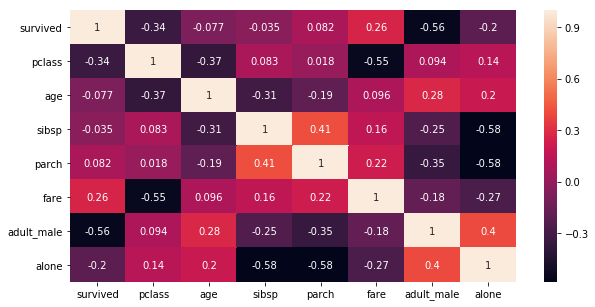

In [16]:
plt.figure(figsize=(10,5))
sns.heatmap(df_titanic.corr(),annot=True)

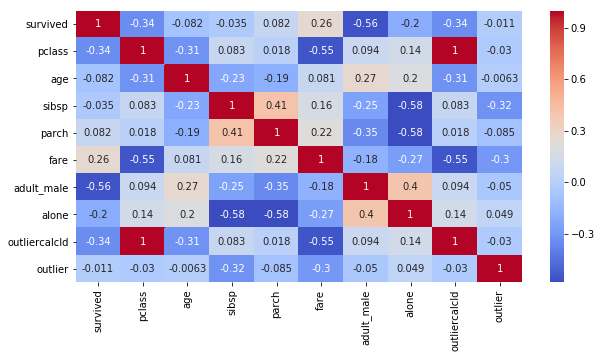

#### b. buatlah countplot seperti dibawah (style=whitegrid, palette=rainbow)

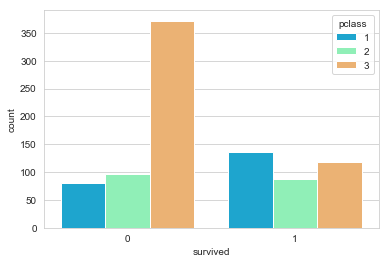

#### c. buatlah histogram age dibawah (color=darkred,bins=30)

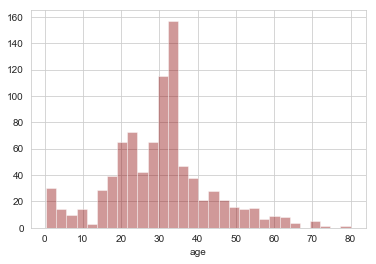